In [5]:
import pandas as pd
import numpy as np


In [7]:
df=pd.read_csv('titanic.csv', sep=',')

In [9]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df['travelalone']=np.where((df['SibSp']+df['Parch'])>0,0,1).astype('uint8')

In [71]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as py


In [73]:
X,y=make_classification(n_samples=9000, n_features=18,n_informative=4, n_redundant=12, random_state=4)


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [77]:
train_scores,test_scores=list(),list()


In [79]:
values=[i for i in range(1,21)]

In [83]:
for i in values:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    train_yhat=model.predict(X_train)
    train_acc=accuracy_score(y_train,train_yhat)
    test_yhat=model.predict(X_test)
    test_acc=accuracy_score(y_test,test_yhat)
    train_scores.append(train_acc)
    train_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' %(i,train_acc,test_acc))
    

>1, train: 0.844, test: 0.820
>2, train: 0.856, test: 0.843
>3, train: 0.878, test: 0.859
>4, train: 0.907, test: 0.887
>5, train: 0.920, test: 0.902
>6, train: 0.931, test: 0.904
>7, train: 0.947, test: 0.922
>8, train: 0.955, test: 0.924
>9, train: 0.974, test: 0.937
>10, train: 0.980, test: 0.938
>11, train: 0.984, test: 0.933
>12, train: 0.987, test: 0.934
>13, train: 0.991, test: 0.931
>14, train: 0.995, test: 0.930
>15, train: 0.997, test: 0.928
>16, train: 0.998, test: 0.930
>17, train: 0.999, test: 0.928
>18, train: 1.000, test: 0.931
>19, train: 1.000, test: 0.928
>20, train: 1.000, test: 0.928


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

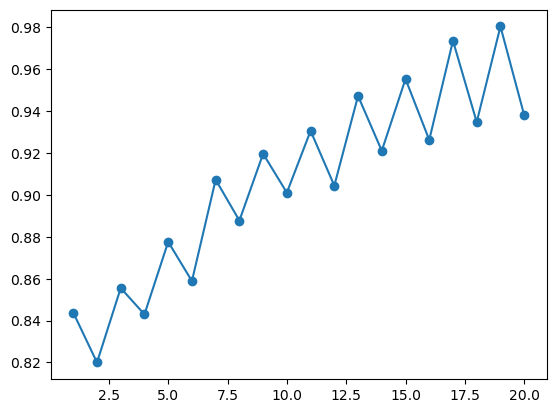

In [93]:
py.plot(values,train_scores,'-o', label='Train')
py.plot(values,test_scores, '-o', label='test')
py.lengend()
py.show()


In [69]:
print(len(values), len(train_scores), len(test_scores))


20 81 0


In [87]:
train_scores = train_scores[:20]
test_scores = test_scores[:20]


In [89]:
print(len(values), len(train_scores), len(test_scores))


20 20 0


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

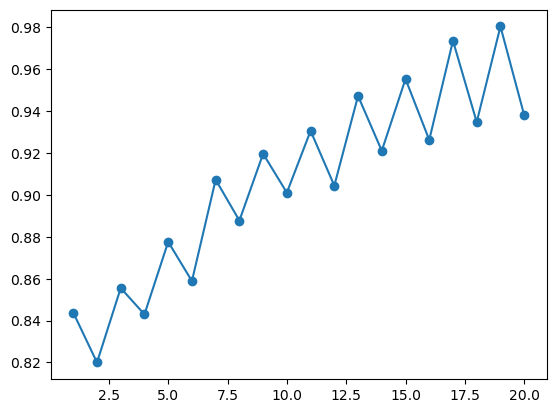

In [91]:
py.plot(values,train_scores,'-o', label='Train')
py.plot(values,test_scores, '-o', label='Test')
py.lengend()
py.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets 



In [15]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()

In [21]:
housing_df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
housing_df['Houseprice']=housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Houseprice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Houseprice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
#check if any missing values
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Houseprice    0
dtype: int64

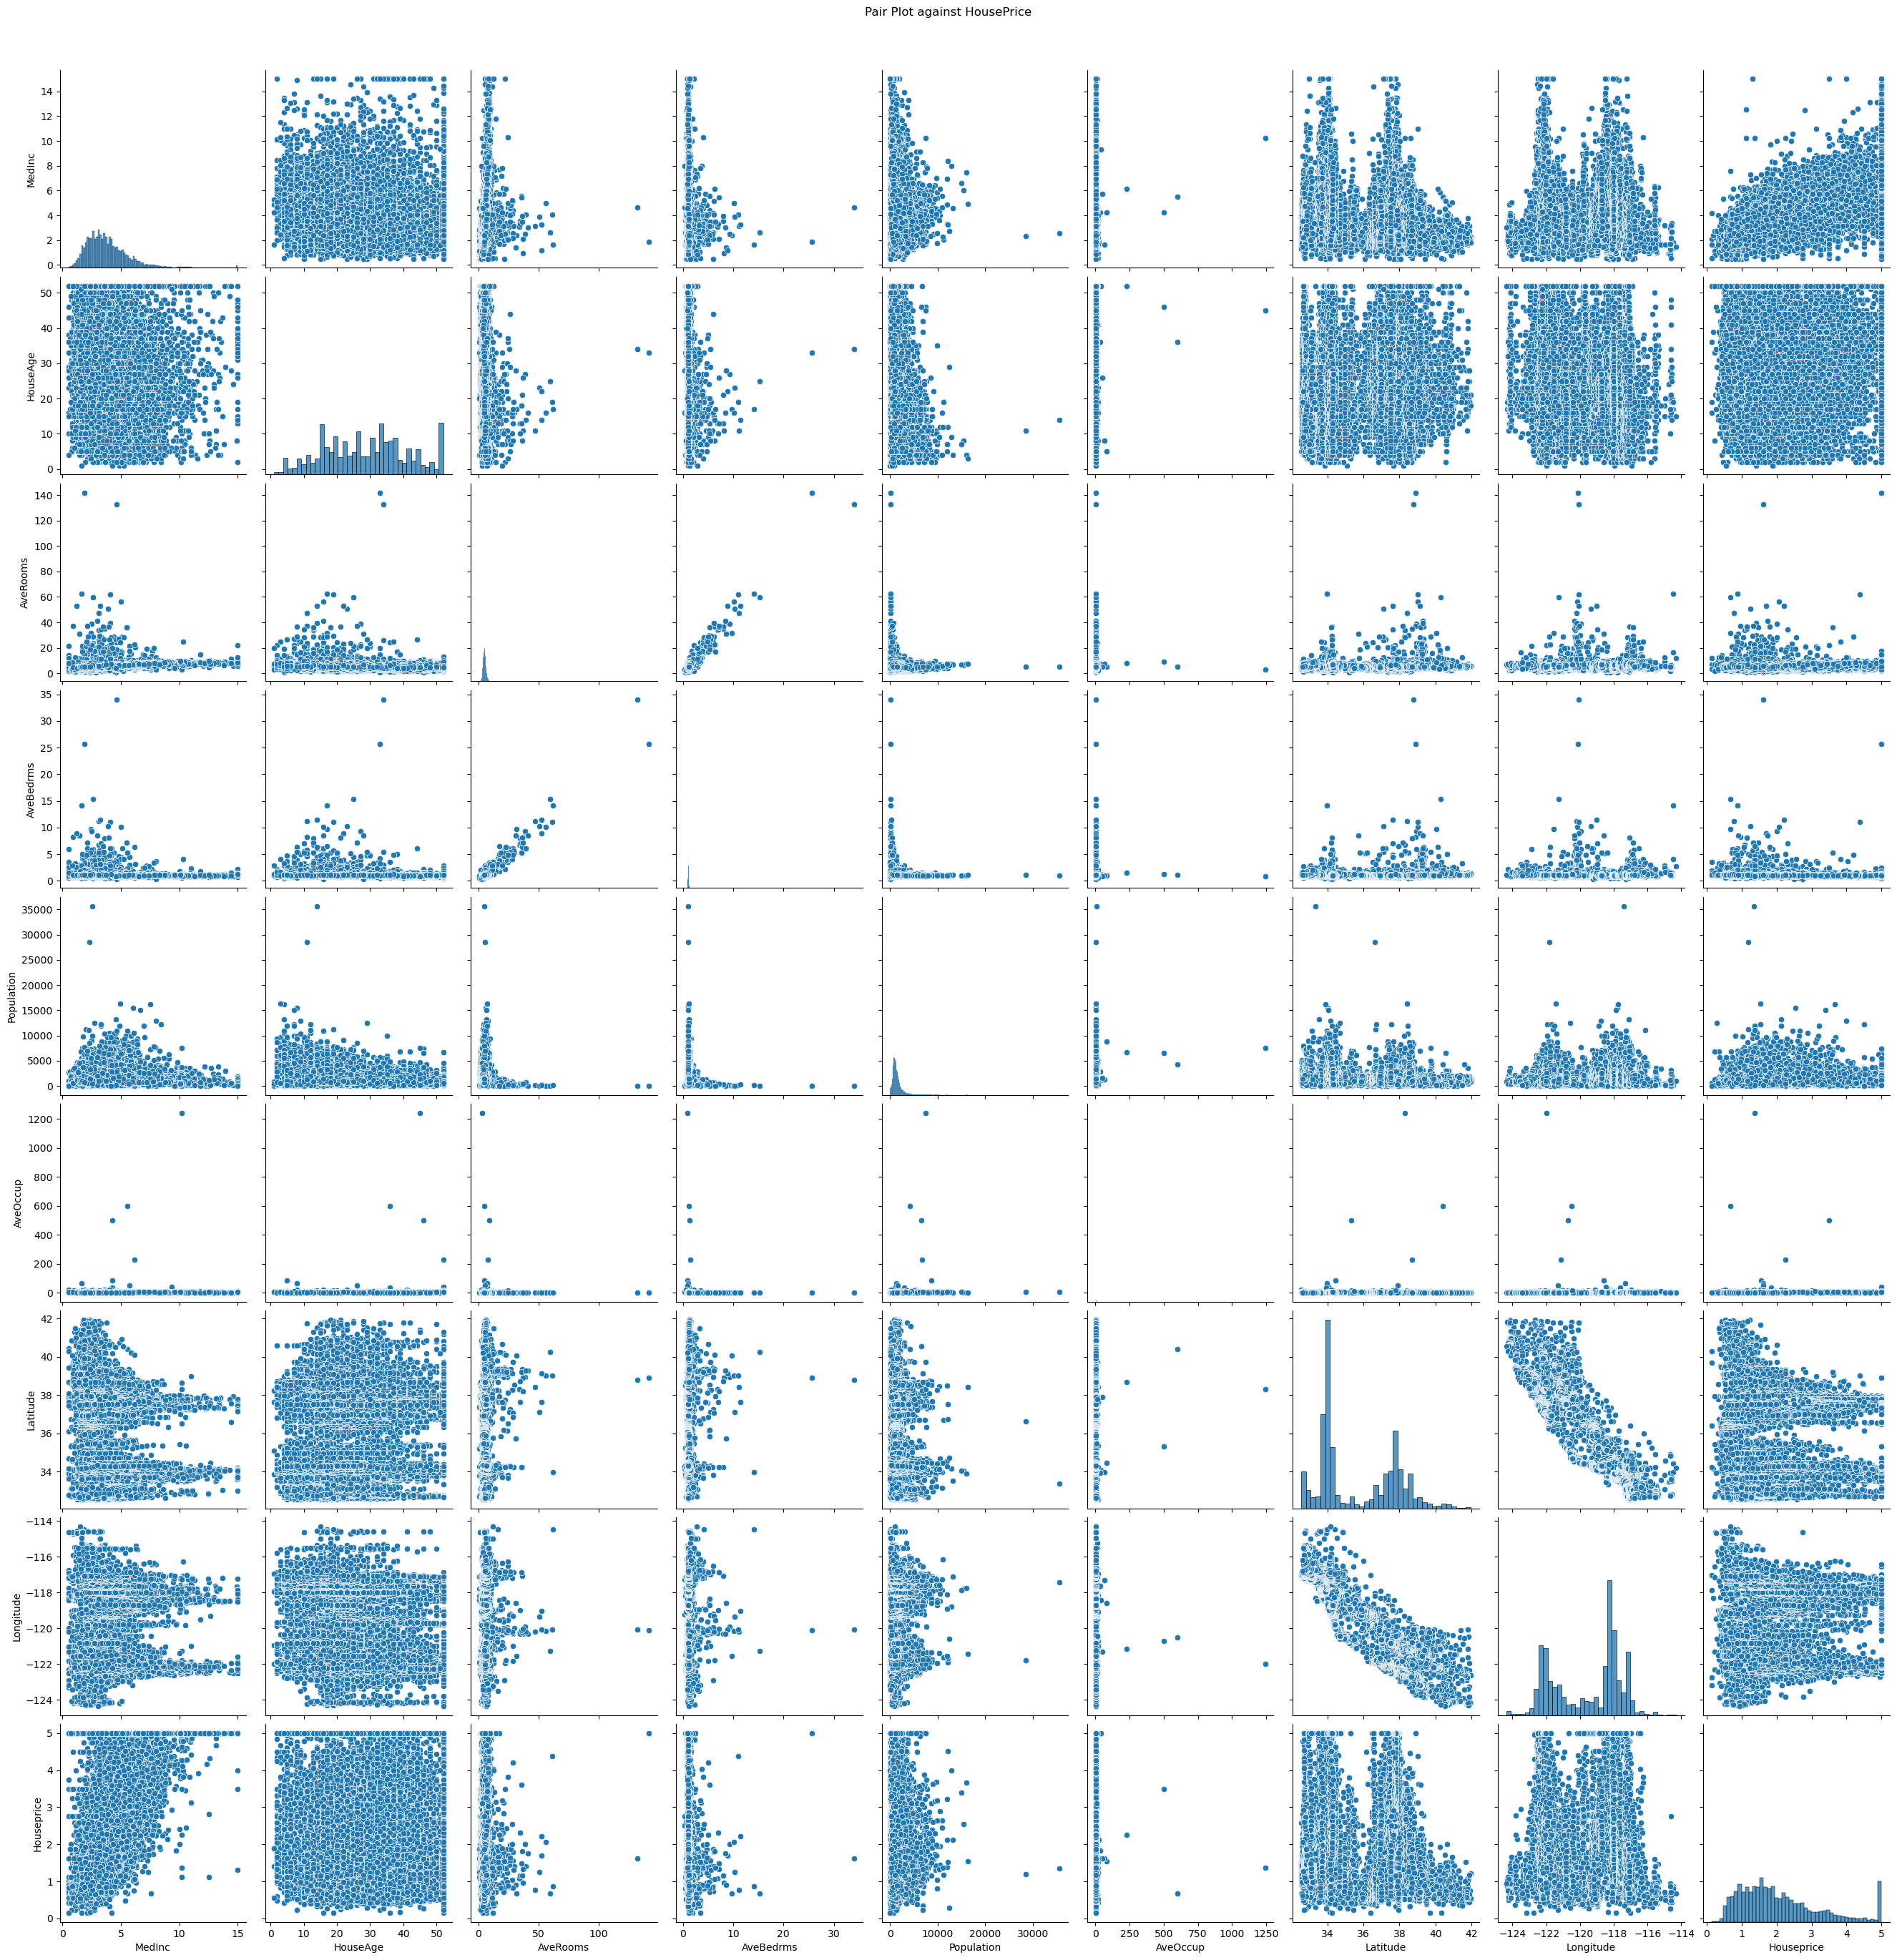

In [29]:
sns.pairplot(housing_df, height=3)
plt.suptitle('Pair Plot of features against HousePrice',y=1.02)
plt.show()

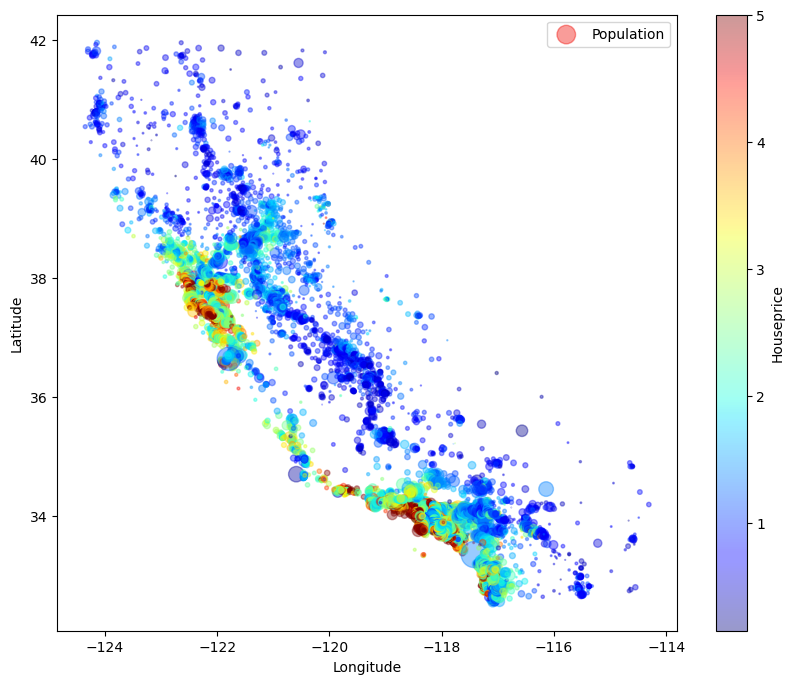

In [45]:
housing_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    s=housing_df["Population"]/100,
    label="Population",
    c="Houseprice",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()




<Axes: >

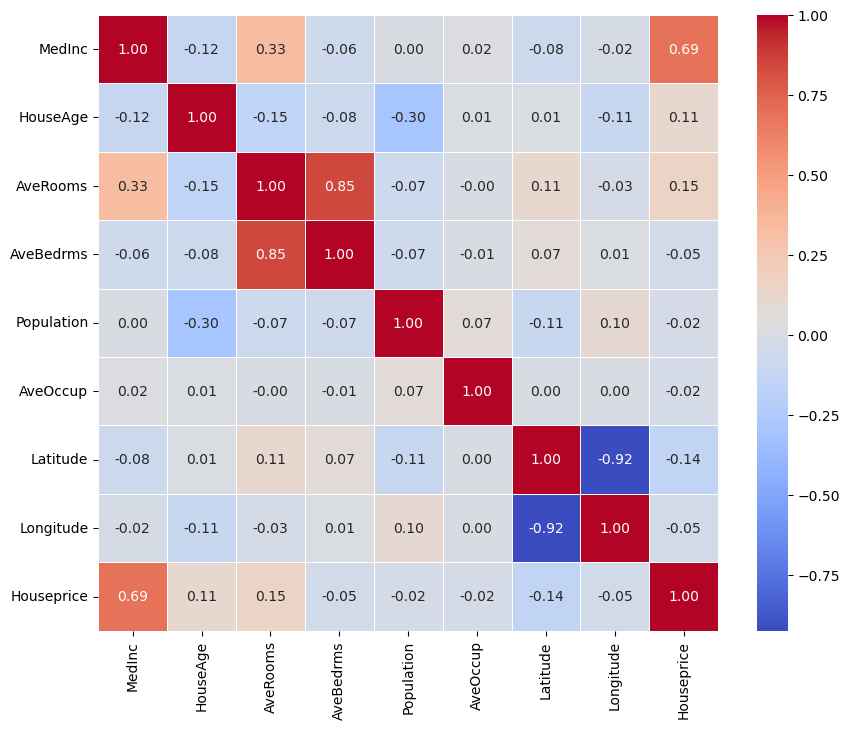

In [47]:
corr=housing_df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr,annot=True, cmap="coolwarm",fmt=".2f",linewidth=0.5)

In [59]:
corr["Houseprice"].abs().sort_values(ascending=False)

Houseprice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: Houseprice, dtype: float64

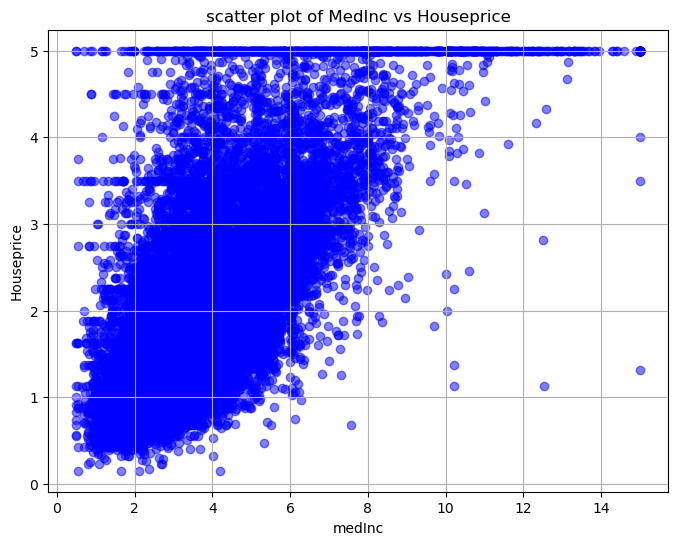

In [71]:
medin=housing_df['MedInc']
houseprice=housing_df['Houseprice']

plt.figure(figsize=(8,6))
plt.scatter(medin,houseprice,alpha=0.5,color='blue')
plt.title('scatter plot of MedInc vs Houseprice')
plt.xlabel('medInc')
plt.ylabel('Houseprice')
plt.grid(True)
plt.show()

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif=housing_df.drop("Houseprice",axis=1)
housing_df_vif=housing_df_vif.apply(pd.to_numeric,errors="coerce")

vif_data=pd.DataFrame()
vif_data["Features"]=housing_df_vif.columns
vif_data["VIF"]=[variance_inflation_factor(housing_df_vif.values,i)for i in range(len(housing_df_vif.columns))]

print(vif_data)


     Features         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [81]:
housing_df=housing_df.drop(['Latitude','Longitude'],axis=1)

In [83]:
cols_to_convert=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert]=housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df['Houseprice']=pd.to_numeric(housing_df['Houseprice'],errors='coerce')

x=sm.add_constant(housing_df.drop('Houseprice',axis=1))
y=housing_df['Houseprice']

model=sm.OLS(y,x).fit()

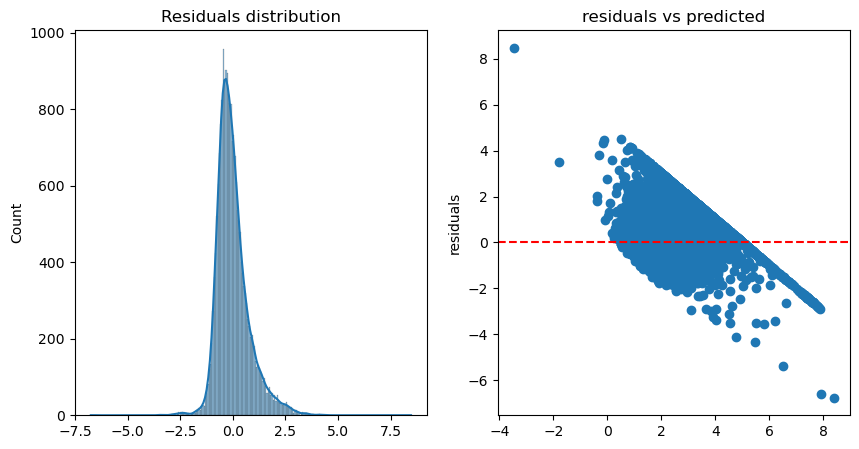

Model Coeffecient: 
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [93]:
residuals=model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title('Residuals distribution')


plt.subplot(1,2,2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.title("residuals vs predicted")
plt.ylabel("residuals")
plt.show()

print("Model Coeffecient: \n",model.params)



In [102]:
from sklearn.metrics import mean_squared_error,r2_score

predictions=model.predict(x)

print("R sqaured score:",r2_score(y,predictions))
print("Mse", mean_squared_error(y,predictions))


R sqaured score: 0.5396977345638283
Mse 0.6129156196698703


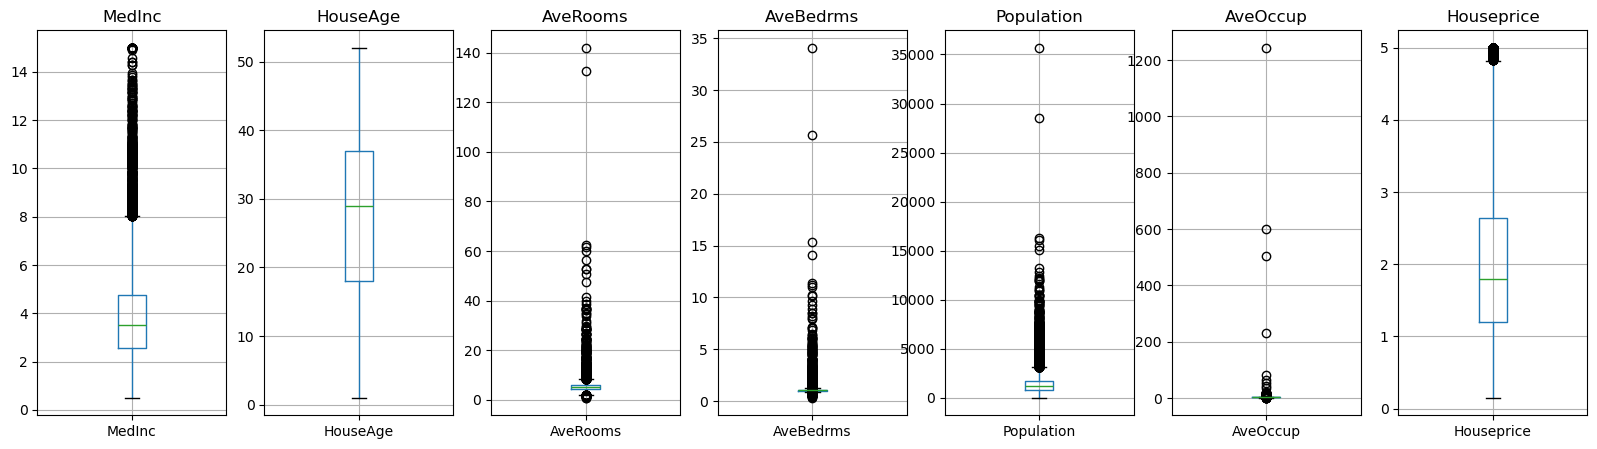

In [110]:
from matplotlib import pyplot as plt

def plot_boxplots(df):
    fig, axes=plt.subplots(1,len(df.columns),figsize=(20,5))
    for i,column_name in enumerate(df.columns):
        df.boxplot(column=column_name,ax=axes[i])
        axes[i].set_title(column_name)

plt.show()


plot_boxplots(housing_df)
    


In [230]:
def remove_outliers(df):
  df_no_outliers=df.copy()
    
  for column_name in df.columns:
        Q1=df[column_name].quantile(0.25)
        Q3=df[column_name].quantile(0.75)

        IQR=Q3-Q1
        lower_bond=Q1-1.5*IQR
        upper_bond=Q3+1.5*IQR

        df_no_outliers[column_name]=df_no_outliers[column_name].apply(lambda x:lower_bond if x<lower_bond else upper_bond if x>upper_bond else x)
  return df_no_outliers
      
housing_df_new=remove_outliers(housing_df)



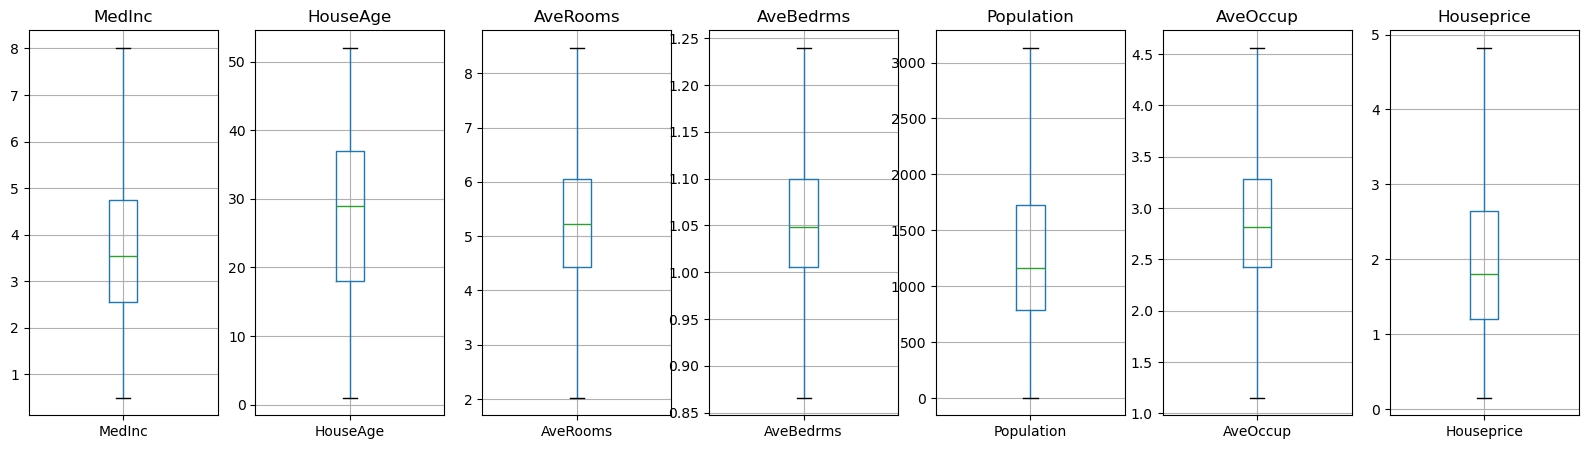

In [232]:
plot_boxplots(housing_df_new)

In [234]:
cols_to_convert=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df_new[cols_to_convert]=housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce')
housing_df_new['Houseprice']=pd.to_numeric(housing_df_new['Houseprice'],errors='coerce')

x=sm.add_constant(housing_df_new.drop('Houseprice',axis=1))
y=housing_df_new['Houseprice']

model=sm.OLS(y,x).fit()

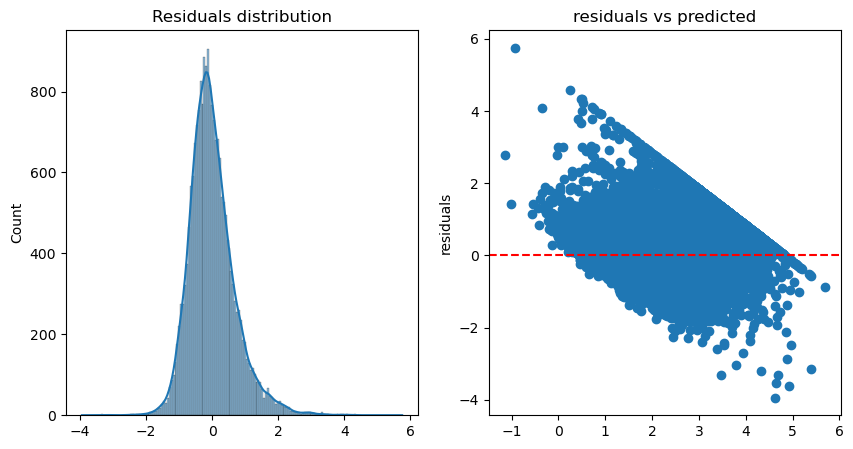

Model Coeffecient: 
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [236]:
residuals=model.resid

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(residuals,kde=True)
plt.title('Residuals distribution')


plt.subplot(1,2,2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.title("residuals vs predicted")
plt.ylabel("residuals")
plt.show()

print("Model Coeffecient: \n",model.params)

In [238]:
from sklearn.metrics import mean_squared_error,r2_score

predictions=model.predict(x)

print("R sqaured score:",r2_score(y,predictions))
print("Mse", mean_squared_error(y,predictions))

R sqaured score: 0.6176968109768021
Mse 0.4900189223577001


In [ ]:


Data Exploration using SMOTE





In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
df=pd.read_csv('cuisines.csv')

In [19]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

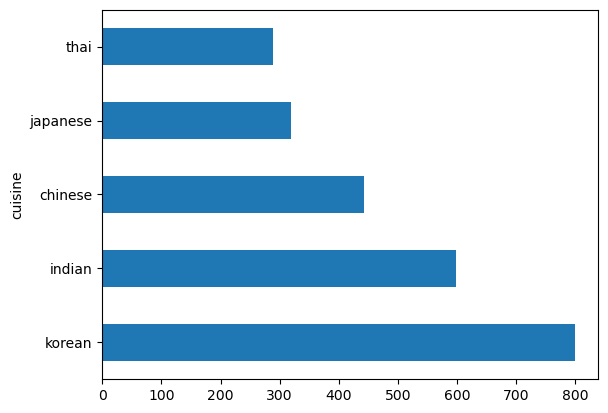

In [27]:
df.cuisine.value_counts().plot.barh()

In [29]:
thai_df=df[(df.cuisine=='thia')]
japanese_df=df[(df.cuisine=='japanese')]
chinese_df=df[(df.cuisine=='chinese')]
indian_df=df[(df.cuisine=='indian')]
korean_df=df[(df.cuisine=='korean')]

In [33]:
print(f'thai df:{thai_df.shape}')
print(f'Japanese df:{japanese_df.shape}')
print(f'chinese df:{chinese_df.shape}')
print(f'indian df:{indian_df.shape}')
print(f'Korean df:{korean_df.shape}')

thai df:(0, 385)
Japanese df:(320, 385)
chinese df:(442, 385)
indian df:(598, 385)
Korean df:(799, 385)


In [59]:
def create_ingredient_df(df):
    ingredient_df=df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df=ingredient_df[(ingredient_df.T!=0).any()]
    ingredient_df=ingredient_df.sort_values(by='value',ascending=False,inplace=False)
    return ingredient_df


<Axes: >

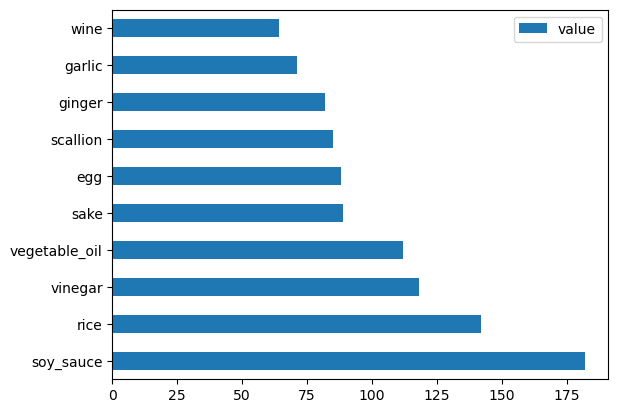

In [63]:
japanese_ingredient_df=create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()


<Axes: >

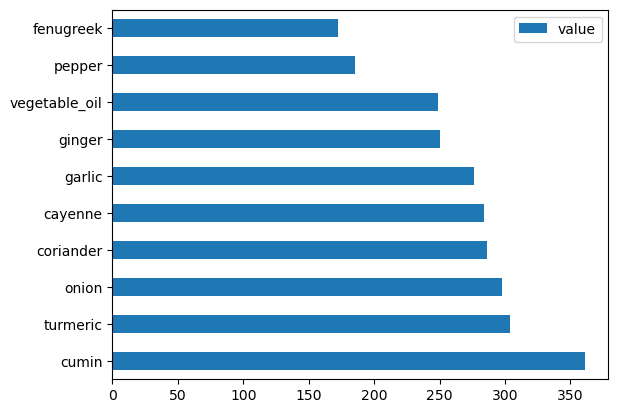

In [65]:
indian_ingredient_df=create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()


In [69]:
features_df=df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'],axis=1)
labels_df=df.cuisine
features_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
transformed_feature_df,tranformed_label_df=oversample.fit_resample(features_df,labels_df)

In [75]:
print(f'new lable count: {tranformed_label_df.value_counts()}')
print(f'new lable count: {labels_df.value_counts()}')



new lable count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
new lable count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64
